In [1]:
import random
from itertools import permutations

%matplotlib inline
import matplotlib.pyplot as plt
import time
from collections import Counter

In [2]:
alltours = permutations

In [3]:
def distance_points(first, second): 
    return abs(first - second)

def distance_tour(aTour):
    return sum(distance_points(aTour[i - 1], aTour[i]) for i in range(len(aTour)))

aCity = complex

def generate_cities (number_of_cities):

    seed=111
    width=500
    height=300
    random.seed((number_of_cities, seed))

    return frozenset(aCity(random.randint(1, width), random.randint(1,height)) for c in range(number_of_cities))

In [4]:
def shortest_tour(tours): 
    return min(tours, key=distance_tour)
    
def brute_force(cities):
    return shortest_tour(alltours(cities))

In [5]:
def X(city): return city.real 
def Y(city): return city.imag


def visualize_segment (segment, style='bo-'):
    plt.plot([X(c) for c in segment], [Y(c) for c in segment], style,clip_on=False) 
    plt.axis('scaled') 
    plt.axis('off')

def visualize_tour(tour, style='bo-'):
    if len(tour) > 1000: 
        plt.figure(figsize=(15, 10)) 
    start = tour[0:1]
    visualize_segment(tour + start, style) 
    visualize_segment(start, 'rD')

In [6]:
def name(algorithm): return algorithm.__name__.replace('_',' ')

def tsp(algorithm,cities):

    t0 = time.perf_counter()
    tour = algorithm(cities)
    t1 = time.perf_counter()


    assert Counter(tour) == Counter(cities)


    visualize_tour(tour)

    print(name(algorithm),": ",distance_tour(tour),"total length  over",len(cities),"cities")
    print("Took",round(t1-t0,2),"seconds")



/var/folders/4r/0mfy5s6s6_5301ss2bc8wlqh0000gn/T/ipykernel_1944/392449891.py:14: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed((number_of_cities, seed))


brute force :  1223.5514480565141 total length  over 10 cities
Took 9.86 seconds


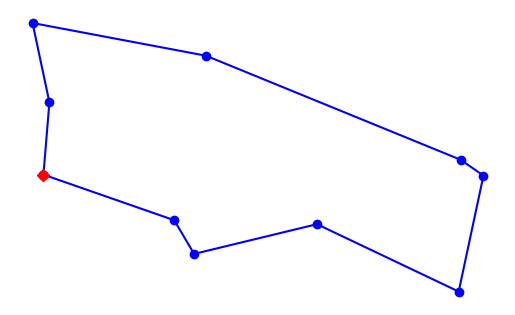

In [7]:
tsp(brute_force,generate_cities(10))